In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(iris.data, iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [2]:
clf.best_estimator_

SVC(C=0.1, kernel='poly')

In [3]:
clf.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [4]:
clf.best_score_

0.9866666666666667

## Test MKCTools
https://pypi.org/project/mkctools/

In [5]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from mkctools import ml_lib
import pandas as pd

In [6]:
ds = datasets.load_wine()
print('取得資料集的資料')
X = ds.data
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

取得資料集的資料


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# simple_ml test
ml_process = ml_lib.simple_ml(X, y)
clf = KNeighborsClassifier(n_neighbors=3)
score = ml_process.train(clf, True)
print(f'score = {score}')

score = 0.9722222222222222


In [9]:
clf = svm.SVC()
score = ml_process.train(clf, True)
print(f'score = {score}')

score = 1.0


## imbalanced data
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#naive-random-over-sampling

In [10]:
!pip install -U imbalanced-learn

In [11]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
X.shape, y.shape

((5000, 2), (5000,))

In [13]:
import numpy as np
np.bincount(y)

array([  64,  262, 4674], dtype=int64)

In [14]:
y[y==0].shape, y[y==1].shape, y[y==2].shape

((64,), (262,), (4674,))

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [16]:
X_resampled.shape

(14022, 2)

In [17]:
y_resampled.shape

(14022,)

In [18]:
y_resampled[y_resampled==0].shape

(4674,)

In [19]:
y_resampled[y_resampled==1].shape

(4674,)

In [20]:
y_resampled[y_resampled==2].shape

(4674,)

## classification_report
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [21]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



## confusion_matrix

In [22]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confmat = confusion_matrix(y_true, y_pred)
print(confmat)

[[2 0 0]
 [0 0 1]
 [1 0 2]]


In [23]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
confmat = confusion_matrix(y_true, y_pred)
print(confmat)

[[2 1]
 [2 3]]


In [25]:
confmat.ravel()

array([2, 1, 2, 3], dtype=int64)

In [24]:
tn, fp, fn, tp = confmat.ravel()
tp, fp, fn, tn

(3, 1, 2, 2)

In [26]:
int(True), int(False)

(1, 0)

## plot_confusion_matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

-----X-----
[[-0.03926799  0.13191176 -0.21120598 ...  1.97698901  1.02122474
  -0.46931074]
 [ 0.77416061  0.10490717 -0.33281176 ...  1.2678044   0.62251914
  -1.49026539]
 [-0.0148577   0.67057045 -0.21416666 ... -0.10486202 -0.10169727
  -0.45130304]
 ...
 [ 0.29673317 -0.49610233 -0.86404499 ... -1.10453952  2.01406015
   0.69042902]
 [ 0.08617684  0.9836362   0.17124355 ...  2.11564734  0.11273794
   1.20985013]
 [-1.58249448 -1.42279491 -0.56430103 ...  1.26661394 -1.31771734
   1.61805427]] (100, 20)
-----y-----
[0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0] (100,)
-----X_train-----
[[-0.65240858  0.49374178  1.30184623 ... -1.30819171 -1.04525337
  -0.11054066]
 [ 0.35178011 -0.47003288 -0.37914756 ... -2.38076394 -0.11048941
  -1.55042935]
 [-1.58249448 -1.42279491 -0.56430103 ...  1.26661394 -1.31771734
   1.61805427]
 .

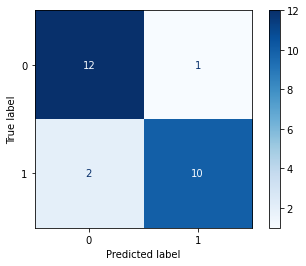

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
print('-----X-----')
print(X, X.shape)
print('-----y-----')
print(y, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('-----X_train-----')
print(X_train, X_train.shape)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()